# Lekcja 5. Równania i układy równań

Znajdowanie pierwiastków (rozwiązań) równań z jedną zmienną oraz układów równań wielu zmiennych jest jednym z najbardziej klasycznych zadań do których wykorzystywane są obliczenia numeryczne. Formalne przedstawienie problemu dla jednej zmiennej wygląda tak: Chcemy znaleźć takie wartości argumentu $x$, dla których wartość funkcji $f(x)$ jest równa $0$. Analityczne rozwiązanie sprowadza się do znalezienia jawnej postaci funkcji odwrotnej, to znaczy takiej funkcji $g$, że jeżeli $f(x)=y$ to $g(y)=x$ a następnie obliczenia $x_0=g(0)$. Z kolei rozwiązanie numeryczne polega na znajdowaniu kolejnych wartości $x_1$, $x_2$ ... $x_n$ takich, że w granicy $\lim_{i\to\infty}x_i=x_0$. Oczywiście nie jesteśmy w stanie liczyć w nieskończoność, dlatego zatrzymujemy się dla wystarczająco dużych $n$. Omówmy szczegółowo dwa przykładowe algorytmy znajdowania pierwiastków dowolnych funkcji ciągłych (w zadanym przedziale).

## Metoda bisekcji

W metodzie bisekcji, zwanej również [metodą równego podziału](https://pl.wikipedia.org/wiki/Metoda_r%C3%B3wnego_podzia%C5%82u) rozpocznynamy poszukiwanie rozwiązania od wybrania takich granic przedziału, aby wartości funkcji w tych granicach miały przeciwne znaki. Następnie znajdujemy środek przedziału i obliczamy wartość funkcji. Wartość ta może wynosić $0$ (znaleźliśmy rozwiązanie i kończym działanie) albo ma taki znak jak wartość w jednej z granic przedziału. Ustawiamy środek jako nową granicę o tym samym znaku i powtarzamy procedurę tak długo, aż osiągniemy zakładaną dokładność (szerokość przedziału poniżej pewnej granicy, określoną liczbę powtórzeń albo wartość funkcji poniżej założonej granicy). Całość jest zilustrowana na rysunku:

image.png

Rozpoczynamy od przedziału $(a_1, b_1)$. Funkcja $f(a_1)$ jest dodatnia a $f(b_1)$ - ujemna, więc rozwiązanie musi się znajdować pomiędzy nimi. Znajdujemy środek, ponieważ wartość funkcji w nim jest ujemna, to podstawiamy go jako prawą granicę $b_2$. Następnie znajdujemy środek nowego przedziału, wartość dotatnia więc podstawiamy jako lewą granicę $a_2$. Ponownie znajdujemy środek, wartość w nim jest dodatnia więc podstawiamy jako lewą granicę $a_3$. Znajdujemy środek, wartość w nim jest poniżej założonej dokładności, więc znaleźliśmy rozwiązanie.

Spójrzmy na implementację tego algorytmu:

In [ ]:
def f(x):
  return 3*x**3+2*x**2-1

a, b = 0, 1
eps = 1e-6
while b - a > eps:
  m = (a + b)/2
  if f(m) == 0:
    break
  else:
    if f(a) * f(m) > 0:
      a=m
    else:
      b=m
print('x = {:.6f}'.format(m))

x = 0.528182


Jest to ten sam przykład, który omawialiśmy na początku lekcji pierwszej. Przeanalizuj go samodzielnie.

Zadanie to możemy rozwiązać dużo prościej, używając gotowej biblioteki `optimize` dostarczonej w pakiecie `scipy` zawierającej funkcję `bisect`:

In [ ]:
from scipy import optimize

def f(x):
  return 3*x**3+2*x**2-1

optimize.bisect(f, 0, 1)


0.5281813269484701

Jak widzimy, gotowa funkcja znalazła to samo rozwiązanie, ale ze znacząco większą dokładnością.

## Metoda Newtona

Drugim często używanym algorytmem znajdowania pierwiastka równania (miejca zerowego funkcji) jest [metoda Newtona](https://pl.wikipedia.org/wiki/Metoda_Newtona). Zaczynamy od podobnych założeń: badana funkcja jest ciągła w podanym zakresie i ma przeciwne znaki na jego końcach. Dodatkowo funkcja powinna mieć pochodną o stałym znaku (to znaczy być rosnąca lub malejąca w całym przedziale). Wybieramy punkt początkowy (zwykle jest to początek lub koniec przedziału, $0$ albo $1$) i wyznaczamy styczną do funkcji w tym punkcie. Punkt przecięcia stycznej z osią $x$ jest (przybliżonym) rozwiązaniem. Jeśli dokładność rozwiązania jest zbyt mała, to podstawiamy je jako punkt początkowy i powtarzamy procedurę. Całość jest zilustrowana na poniższym rysunku:

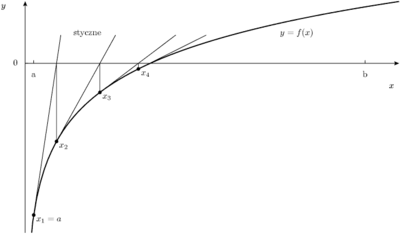

Zaimplementujmy ten algorytm, samą pochodną policzymy również numerycznie (szczegóły w kolejnej lekcji):

In [ ]:
def newton(f,x0,epsilon,max_iter):
  def Df(f,x):
    return (f(x+5e-7)-f(x-5e-7))/1e-6
  xn = x0
  for n in range(max_iter):
    fxn = f(xn)
    if abs(fxn) < epsilon:
      return xn
    Dfxn = Df(f,xn)
    if Dfxn == 0:
      return None
    xn = xn - fxn/Dfxn
  return None

def f(x):
  return 3*x**3+2*x**2-1

print(newton(f,1,1e-4,1000))

0.5281834031650157


Ponownie, zadanie robi się dużo prostsze, jeśli użyjemy modułu `optimize` z biblioteki `scipy`:

In [ ]:
from scipy import optimize

def f(x):
  return 3*x**3+2*x**2-1

optimize.newton(f, 1)


0.528181326947777

## Obliczanie pierwiastków wielomianu

Przy rozwiązywaniu różnych problemów często konieczne jest znalezienie pierwiastków wielomianu. [Zasadnicze twierdzenie algebry](https://pl.wikipedia.org/wiki/Zasadnicze_twierdzenie_algebry) w jednej ze swoich form mówi, że pierwiastki wielomianu są jednoznacznie zdefiniowane przez jego współczynniki. Tak więc każdy wielomian w postaci $a_n\cdot x^n+a_{n-1}\cdot x^{n-1}+\ldots+a_1\cdot x+a_0$ da się sprowadzić do postaci $a_n(x-x_n)(x-x_{n-1})\cdot\ldots\cdot (x-x_1)$ gdzie $x_1$, $x_2$, $\ldots$, $x_n$ są pierwiastkami (miejscami zerowymi) wielomianu. Inaczej mówiąc, dla każdego wielomianu stopnia $n\geqslant1$: $$\sum_{i=0}^{n}a_i\cdot x^i=a_n\prod_{i=1}^{n}(x-x_i)$$.

Przeliczanie jednej formy na drugą jest dość skomplikowane, jednak po raz kolejny z pomocą przychodzi nam pakiet `numpy`. Jeśli wielomian zapiszemy w postaci wektora współczynników, to możemy skorzystać z metody `roots`, która zwraca wektor pierwiastków. Analogicznie, mając wektor pierwiastków możemy znaleźć wektor współczynników używając metody `poly`. Załóżmy, że chcemy rozwiązać równanie $$x^4−11\cdot x^3+9\cdot x^2+11\cdot x−10=0$$

In [ ]:
import numpy as np

coeffs = np.array([1, -11, 9, 11, -10])

roots = np.roots(coeffs)
print(roots)

[10.+0.0000000e+00j -1.+0.0000000e+00j  1.+9.6357437e-09j
  1.-9.6357437e-09j]


Widzimy, że rozwiązaniami są $x_1=10$, $x_2=-1$ oraz $x_3=x_4=1$ (rozwiązanie podwójne jest zespolone, ale część urojona jest na tyle mała, że prawdopodobnie jest konsekwencją wyłącznie niedokładności obliczeń numerycznych). Sprawdźmy to:

In [ ]:
import numpy as np

roots=np.array([10, -1, 1, 1])

print(np.poly(roots))


[  1. -11.   9.  11. -10.]


## Rozwiązywanie układu równań liniowych

Mamy układ $n$ równań liniowych z $n$ niewiadomymi w postaci:

$$\begin{cases}
a_{11}\cdot x_1 + a_{12}\cdot x_2 + \ldots + a_{1n}\cdot x_n & = c_1 \\ 
a_{21}\cdot x_1 + a_{22}\cdot x_2 + \ldots + a_{2n}\cdot x_n & = c_2  \\ 
 \ldots \\
a_{n1}\cdot x_1 + a_{n2}\cdot x_2 + \ldots + a_{nn}\cdot x_n & = c_n 
\end{cases}$$

Układ taki możemy zapisać w postaci równania macierzowego:

$$\begin{bmatrix}
a_{11} & a_{12} & \ldots & a_{1n}\\ 
a_{21} & a_{22} & \ldots & a_{2n}\\ 
 \ldots \\ 
a_{31} & a_{32} & \ldots & a_{3n}
\end{bmatrix}\begin{bmatrix}
x_1\\
x_2\\
\ldots \\
x_n
\end{bmatrix}=\begin{bmatrix}
c_1\\
c_2\\
\ldots \\
c_n
\end{bmatrix}$$

lub w skrócie $AX=C$, gdzie $A$ jest macierzą współczynników, $X$ - wektorem rozwiązań a $C$ - wektorem wyrazów wolnych. Dla każdej macierzy dla której istnieje macierz odwrotna zachodzi $A^{-1}A=I$, więc rozwiązanie naszego układu równań można znaleźć mnożąc obie strony równania z prawej strony przez macierz odwrotną do macierzy współczynników:

$$
\begin{matrix}
AX &=& C\\
A^{-1}AX &=& A^{-1}C\\
IX &=& A^{-1}C\\
X &=& A^{-1}C
\end{matrix}
$$

Pakiet `numpy` w module `linalg` zawiera zarówno funkcję odwracającą macierze `inv(a)`, jak również gotową funkcję rozwiązującą równania macierzowe `solve(a,c)`. Przetestujmy ich działanie na przykładzie. Rozwiążmy układ dwóch równań z dwiema niewiadomymi:
$$\begin{cases}
 x &+& 2y &=& 1 \\ 
 3x &+& 5 y &=& 2
\end{cases}
$$

wykorzystując obie metody:

In [ ]:
import numpy as np

A = np.array([[1, 2],[3, 5]])
C = np.array([1, 2])

# znajdowanie pierwiastków przez odwracanie macierzy A
invA= np.linalg.inv(A)
X=np.dot(invA,C)
print(X)
print()

# znajdowanie pierwiastków wbudowaną funkcją solve()
print(np.linalg.solve(A,C))

[-1.  1.]

[-1.  1.]


Możemy przetestować poprawność rozwiązań podstawiając je do oryginalnego równania:

In [ ]:
np.allclose(np.dot(A, X), C)

True

Oczywiście powyższe to jedynie krótka zachęta do samodzielnego zapoznania się z dokumentacją modułów [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html) oraz [numpy.linalg](https://numpy.org/doc/stable/reference/routines.linalg.html) i przetestowania podanych tam przykładów.